In [35]:
# 所用到的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# import seaborn as sns
from sklearn.linear_model import LogisticRegression
from typing import List
import math
import os
os.makedirs('result', exist_ok=True)

In [36]:
# 读入新冠数据
xinguan = pd.read_csv('china_provincedata1.csv' ,encoding='gbk')
xinguan.head()

,id,confirmedCount,confirmedIncr,curedCount,curedIncr,currentConfirmedCount,currentConfirmedIncr,dateId,deadCount,deadIncr,suspectedCount,suspectedCountIncr,provinceName,provinceShortName
0,1,5,5,0,0,5,5,20200120,0,0,0,0,北京市,北京
1,2,10,5,0,0,10,5,20200121,0,0,0,0,北京市,北京
2,3,14,4,0,0,14,4,20200122,0,0,0,0,北京市,北京
3,4,26,12,0,0,26,12,20200123,0,0,0,0,北京市,北京
4,5,36,10,0,0,36,10,20200124,0,0,0,0,北京市,北京


In [37]:
# 读入鸢尾花数据
yuanweihua = pd.read_csv('iris.csv' ,encoding='gbk', header=None)
# 重新设置数据列名
yuanweihua.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'category']
yuanweihua.head()

,sepal_length,sepal_width,petal_length,petal_width,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# 鸢尾花数据描述
yuanweihua.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [39]:
# 新冠数据描述
yuanweihua.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


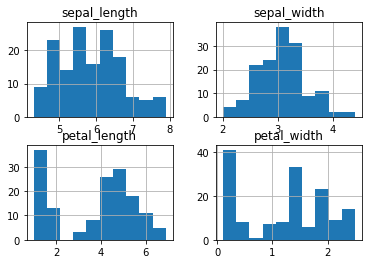

In [40]:
# 鸢尾花直方图
plt.show(yuanweihua.hist().data)

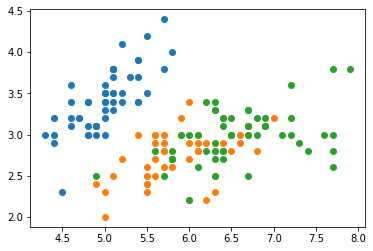

In [41]:
# 鸢尾花花萼散点图
for cat in pd.unique(yuanweihua['category']):
    cat_df = yuanweihua[yuanweihua['category'] == cat]
    plt.scatter(cat_df['sepal_length'], cat_df['sepal_width'], label=cat)
plt.show()

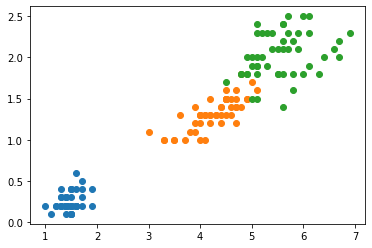

In [42]:
# 鸢尾花花瓣散点图
for cat in pd.unique(yuanweihua['category']):
    cat_df = yuanweihua[yuanweihua['category'] == cat]
    plt.scatter(cat_df['petal_length'], cat_df['petal_width'], label=cat)
plt.show()

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

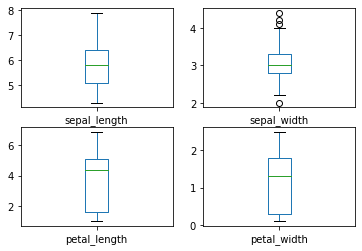

In [50]:
# 鸢尾花数据盒图
yuanweihua.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

In [54]:
# 鸢尾花分位数
for col in yuanweihua.columns[:-1]:
    print(f"{col}:\t第一四分位数:{yuanweihua[col].describe()['25%']:0.2f},\t第二四分位数:{yuanweihua[col].describe()['50%']:0.2f},\t第三四分位数:{yuanweihua[col].describe()['75%']:0.2f}")

sepal_length:	第一四分位数:5.10,	第二四分位数:5.80,	第三四分位数:6.40
sepal_width:	第一四分位数:2.80,	第二四分位数:3.00,	第三四分位数:3.30
petal_length:	第一四分位数:1.60,	第二四分位数:4.35,	第三四分位数:5.10
petal_width:	第一四分位数:0.30,	第二四分位数:1.30,	第三四分位数:1.80


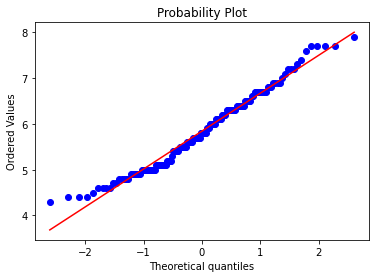

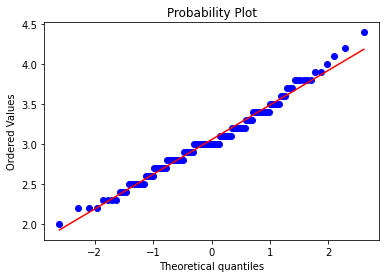

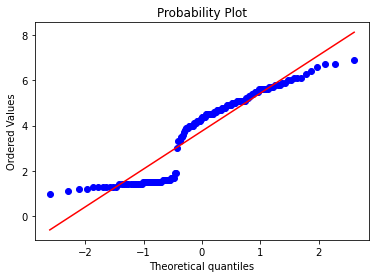

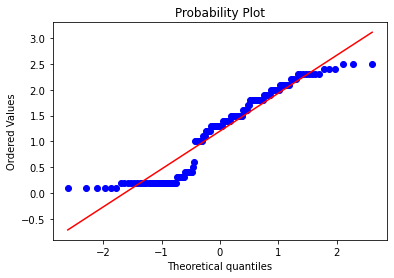

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [55]:
# 鸢尾花Q-Q图
for col in yuanweihua.columns:
    stats.probplot(yuanweihua[col], dist='norm', plot=plt)
    plt.show()

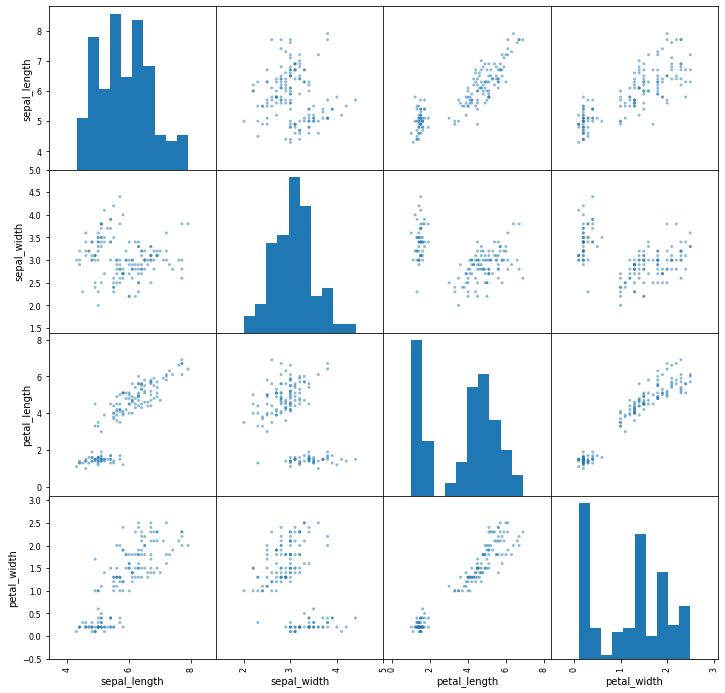

In [57]:
# 鸢尾花相关性分析
pd.plotting.scatter_matrix(yuanweihua, figsize=(12,12),range_padding=0.5)
plt.show()

In [58]:
yuanweihua.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [61]:
np.cov(yuanweihua.drop(columns=['category']).T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [62]:
# 新冠回归预测
province_df = covid_df[covid_df['provinceShortName']=='福建']
province_df = province_df.reset_index(drop=True)
province_df.head()

,id,confirmedCount,confirmedIncr,curedCount,curedIncr,currentConfirmedCount,currentConfirmedIncr,dateId,deadCount,deadIncr,suspectedCount,suspectedCountIncr,provinceName,provinceShortName
0,1636,1,1,0,0,1,1,20200122,0,0,0,0,福建省,福建
1,1637,3,2,0,0,3,2,20200123,0,0,0,0,福建省,福建
2,1638,18,15,0,0,18,15,20200124,0,0,0,0,福建省,福建
3,1639,29,11,0,0,29,11,20200125,0,0,0,0,福建省,福建
4,1640,56,27,0,0,56,27,20200126,0,0,0,0,福建省,福建


In [63]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
y = np.asarray(province_df['confirmedCount']).reshape(-1, 1)
X = np.asarray(range(0, len(y))).reshape(-1, 1)
model.fit(X, y)
ynew = model.predict(np.array(range(180)).reshape(-1, 1))
ynew

e:\anaconda\envs\pytorch160\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([  1, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296,
       296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296,
       296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296,
       296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296,
       296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296,
       296, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356,
       356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356,
       356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356,
       356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356,
       356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356,
       356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356,
       356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356, 356,
       356, 356, 356, 356, 356, 363, 363, 363, 363, 363, 363, 363, 363,
       363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363], d

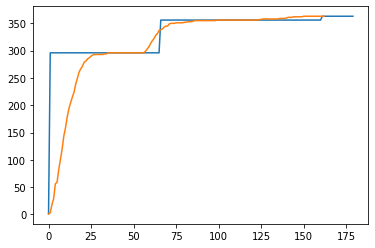

In [65]:
plt.plot(range(180), ynew)
plt.plot(range(len(y)), y)
plt.show()